# This notebook generates data plotted in Figs. 2, 3, 10, 11, 12

In [1]:
import numpy as np
from math import exp,sqrt,log, pi, sin, cos
import math
import numpy.random as rand
import timeit

from scipy.interpolate import spline

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sys
import os
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
   sys.path.append(nb_dir)
import timeit

from scipy.stats import chi2
from scipy.fftpack import fft, fft2
from scipy.signal import argrelextrema

from scipy import signal

### Check individual conditions:

In [2]:
# frequency and magnitude conditions
f1 = [2.0, 2.4, 4.0, 4.8]
f2 = [2.0, 1.6, 4.0, 3.2]
m1 = [1.0, 2.0, 1.14, 2.29]
m2 = [1.0, 2.0, 0.86, 1.71]

f_index = 3
m_index = 1
choose_f1 = f1[f_index] 
choose_m1 = m1[m_index]
choose_f2 = f2[f_index] 
choose_m2 = m2[m_index]
choose_fcond =1 #0 or 1
DTcross = []
cross_chosen=[]
DTmddm = []
mddm_chosen = []
filepath = '../DataGeneration/DataFiles/DistributionDTData_Freq1_' + str(choose_f1) + '_Freq2_' + str(choose_f2) + '_Mag1_' + str(choose_m1) + '_Mag2_' + str(choose_m2) + '_FreqCond_' + str(choose_fcond)
with open(str(filepath) + '.csv', 'r') as infile:
    infile.readline
    for line in infile:
        if not line.startswith('#'): # I usually use the first line in a data file to give some info using "#" 
            cross_chosen.append(float(line.split(',')[0]))
            DTcross.append(float(line.split(',')[1]))  # "split" separates all objects in a line when delimeter "," occurs
            mddm_chosen.append(float(line.split(',')[2]))
            DTmddm.append(float(line.split(',')[3]))  # all objects in the data file are strings 

In [3]:
#DTcross=[DTcross[kk] for kk in range(len(DTcross)) if cross_chosen[kk]==2]
DTcross = np.asarray(DTcross)
#DTmddm=[DTmddm[kk] for kk in range(len(DTmddm)) if mddm_chosen[kk]==2]
DTmddm = np.asarray(DTmddm)

In [5]:
print('Mean DT cross = ', np.mean(DTcross))
print('Standard error of the mean DTcross = ', np.std(DTcross)/math.sqrt(len(DTcross)))
print('Mean DT mddm = ', np.mean(DTmddm))
print('Standard error of the mean DT mddm = ', np.std(DTmddm)/math.sqrt(len(DTmddm)))

Mean DT cross =  1.40939669
Standard error of the mean DTcross =  0.0014961757411
Mean DT mddm =  1.18037686
Standard error of the mean DT mddm =  0.00310424548233


<IPython.core.display.Javascript object>


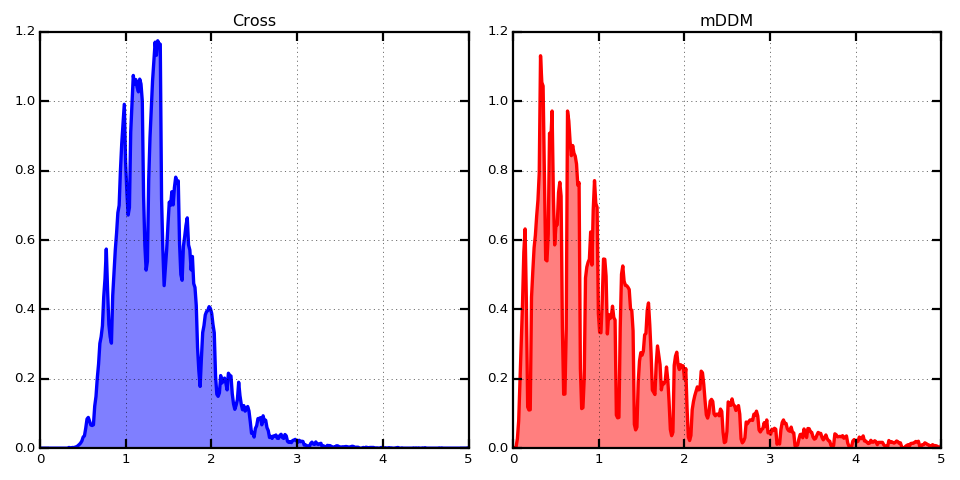

In [6]:
binNr = 1001
bin_edges = np.linspace(0, 15, binNr, endpoint=True)

yCross,binEdgesCross=np.histogram(DTcross,bins=bin_edges,normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddm,bins=bin_edges,normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

#print(bin_edges)
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid((1, 4), (0, 0), colspan=2)
ax1.grid(True)
#ax1.grid(color='grey', linestyle='--', linewidth=1)
#ax1.patch.set_facecolor('LightGrey')
#ax1.patch.set_alpha(0.3)
ax1.hist(DTcross, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax1.plot(xnewCross,y_smoothCross, lw=3, c='b');
ax1.set_title('Cross')
ax2 = plt.subplot2grid((1, 4), (0, 2), colspan=2, sharey=ax1)
ax2.hist(DTmddm, bins=bin_edges, color='red', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax2.plot(xnewMddm,y_smoothMddm, lw=3, c='r');
ax2.set_title('mDDM')
for ax in [ax1, ax2]:
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')
    ax.tick_params('both', length=8, width=2, which='major')
    ax.tick_params('both', length=6, width=1, which='minor')
    ax.set_xlim([0,5])
ax2.grid(True)
plt.show
plt.tight_layout()

<IPython.core.display.Javascript object>


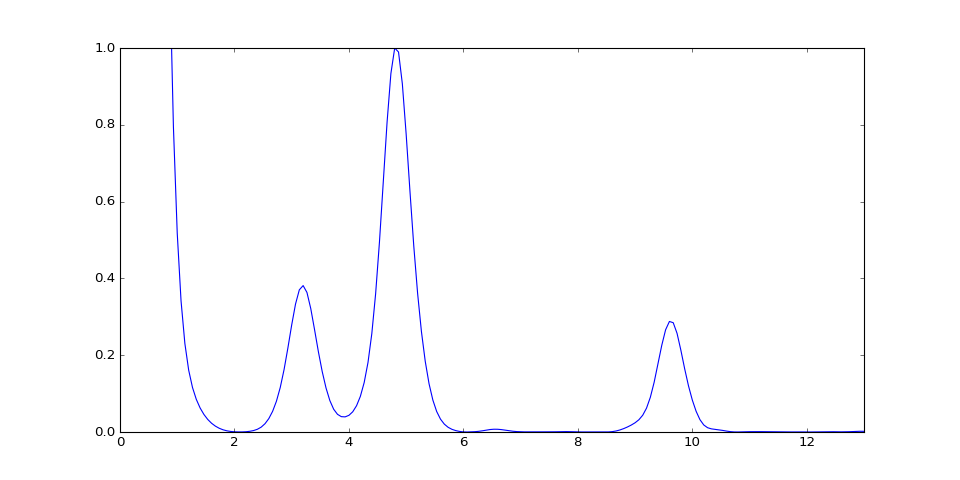

(0, 1)

In [30]:
# Fourier transform to get frequencies in DT distributions
fig = plt.figure(figsize=(12, 6))
sp = np.fft.rfft(y_smoothCross)
t=xnewCross
freq = np.fft.rfftfreq(t.shape[-1], d=t[1]-t[0])
quad = sp.real**2+sp.imag**2
quad=quad/np.max(quad[30:])
#plt.plot(freq, sp.real, freq, sp.imag, freq, sp.imag**2, freq, sp.real**2);
plt.plot(freq, quad)
plt.xlim(0,13)
plt.ylim(0, 1)

#signal= y_smoothCross
#n = signal.size
#fourier = np.fft.fft(signal)
#timestep=0.1
#freq = np.fft.fftfreq(n, d=timestep)

#freq

<IPython.core.display.Javascript object>


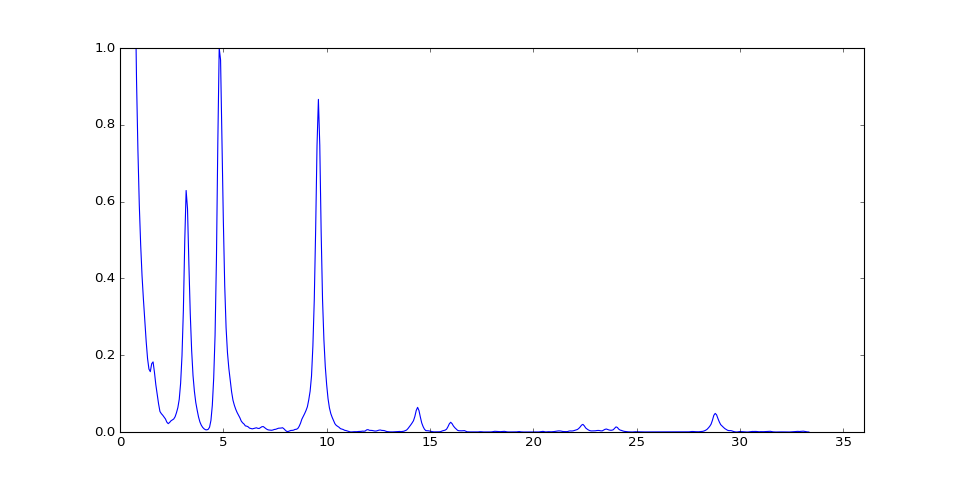

(0, 1)

In [31]:
# Fourier transform to get frequencies in DT distributions
fig = plt.figure(figsize=(12, 6))
sp = np.fft.rfft(y_smoothMddm)
t=xnewMddm
freq = np.fft.rfftfreq(t.shape[-1],d=t[1]-t[0])
#print(freq[1]-freq[0])
quad = sp.real**2+sp.imag**2
quad=quad/np.max(quad[30:])
#plt.plot(freq, sp.real, freq, sp.imag, freq, sp.real**2);
plt.plot(freq, quad)
plt.xlim(0,36)
plt.ylim(0, 1)

### The following cells produce Figs. 10 & 11 
(depending on the choice of  the `choose_fcond` parameter)

In [7]:
f1 = [2.0, 2.4, 4.0, 4.8]
f2 = [2.0, 1.6, 4.0, 3.2]
m1 = [1.0, 2.0, 1.14, 2.29]
m2 = [1.0, 2.0, 0.86, 1.71]

ID_LETT = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
ID_LETT_INDEX = 0

f_index_range = 4
m_index_range = 4

choose_fcond = 1 #0 or 1
choiceCross = []
DTcross = []
choiceMddm = []
DTmddm = []
#filepath = 'DistributionDTData_Continuous_Mag1_' + str(choose_m1) + '_Mag2_' + str(m2)

for f_index in range(f_index_range):
    for m_index in range(m_index_range):
        choose_f1 = f1[f_index]
        choose_f2 = f2[f_index]
        choose_m1 = m1[m_index]
        choose_m2 = m2[m_index]
        print(str(ID_LETT[ID_LETT_INDEX])+': ' , 'f1 = ', choose_f1, 'f2 = ', choose_f2, 'rho_f = ', choose_f1/choose_f2, 'm1 = ', choose_m1, 'm2 = ', choose_m2, 'rho_m = ', choose_m1/choose_m2)
        filepath = '../DataGeneration/DataFiles/DistributionDTData_Freq1_' + str(choose_f1) + '_Freq2_' + str(choose_f2) + '_Mag1_' + str(choose_m1) + '_Mag2_' + str(choose_m2) + '_FreqCond_' + str(choose_fcond)
        with open(str(filepath) + '.csv', 'r') as infile:
            infile.readline
            for line in infile:
                if not line.startswith('#'): # I usually use the first line in a data file to give some info using "#" 
                    choiceCross.append(float(line.split(',')[0]))
                    DTcross.append(float(line.split(',')[1]))  # "split" separates all objects in a line when delimeter "," occurs
                    choiceMddm.append(float(line.split(',')[2]))
                    DTmddm.append(float(line.split(',')[3]))  # all objects in the data file are strings 
        ID_LETT_INDEX += 1
                    

A:  f1 =  2.0 f2 =  2.0 rho_f =  1.0 m1 =  1.0 m2 =  1.0 rho_m =  1.0
B:  f1 =  2.0 f2 =  2.0 rho_f =  1.0 m1 =  2.0 m2 =  2.0 rho_m =  1.0
C:  f1 =  2.0 f2 =  2.0 rho_f =  1.0 m1 =  1.14 m2 =  0.86 rho_m =  1.3255813953488371
D:  f1 =  2.0 f2 =  2.0 rho_f =  1.0 m1 =  2.29 m2 =  1.71 rho_m =  1.3391812865497077
E:  f1 =  2.4 f2 =  1.6 rho_f =  1.4999999999999998 m1 =  1.0 m2 =  1.0 rho_m =  1.0
F:  f1 =  2.4 f2 =  1.6 rho_f =  1.4999999999999998 m1 =  2.0 m2 =  2.0 rho_m =  1.0
G:  f1 =  2.4 f2 =  1.6 rho_f =  1.4999999999999998 m1 =  1.14 m2 =  0.86 rho_m =  1.3255813953488371
H:  f1 =  2.4 f2 =  1.6 rho_f =  1.4999999999999998 m1 =  2.29 m2 =  1.71 rho_m =  1.3391812865497077
I:  f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  1.0 m2 =  1.0 rho_m =  1.0
J:  f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  2.0 m2 =  2.0 rho_m =  1.0
K:  f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  1.14 m2 =  0.86 rho_m =  1.3255813953488371
L:  f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  2.29 m2 =  1.71 rho_m =  1.339181286549707

In [72]:
tlen = 100000
DTcross = np.asarray(DTcross)
DTmddm = np.asarray(DTmddm)

whichDistr = "both" # "both", "false", or "correct" 

choiceCrossA = choiceCross[0:tlen]
DTcrossA = DTcross[0:tlen]
choiceCrossB = choiceCross[tlen:2*tlen]
DTcrossB = DTcross[tlen:2*tlen]
choiceCrossC = choiceCross[2*tlen:3*tlen]
DTcrossC = DTcross[2*tlen:3*tlen]
choiceCrossD = choiceCross[3*tlen:4*tlen]
DTcrossD = DTcross[3*tlen:4*tlen]
choiceCrossE = choiceCross[4*tlen:5*tlen]
DTcrossE = DTcross[4*tlen:5*tlen]
choiceCrossF = choiceCross[5*tlen:6*tlen]
DTcrossF = DTcross[5*tlen:6*tlen]
choiceCrossG = choiceCross[6*tlen:7*tlen]
DTcrossG = DTcross[6*tlen:7*tlen]
choiceCrossH = choiceCross[7*tlen:8*tlen]
DTcrossH = DTcross[7*tlen:8*tlen]
choiceCrossI = choiceCross[8*tlen:9*tlen]
DTcrossI = DTcross[8*tlen:9*tlen]
choiceCrossJ = choiceCross[9*tlen:10*tlen]
DTcrossJ = DTcross[9*tlen:10*tlen]
choiceCrossK = choiceCross[10*tlen:11*tlen]
DTcrossK = DTcross[10*tlen:11*tlen]
choiceCrossL = choiceCross[11*tlen:12*tlen]
DTcrossL = DTcross[11*tlen:12*tlen]
choiceCrossM = choiceCross[12*tlen:13*tlen]
DTcrossM = DTcross[12*tlen:13*tlen]
choiceCrossN = choiceCross[13*tlen:14*tlen]
DTcrossN = DTcross[13*tlen:14*tlen]
choiceCrossO = choiceCross[14*tlen:15*tlen]
DTcrossO = DTcross[14*tlen:15*tlen]
choiceCrossP = choiceCross[15*tlen:16*tlen]
DTcrossP = DTcross[15*tlen:16*tlen]

choiceMddmA = choiceMddm[0:tlen]
DTmddmA = DTmddm[0:tlen]
choiceMddmB = choiceMddm[tlen:2*tlen]
DTmddmB = DTmddm[tlen:2*tlen]
choiceMddmC = choiceMddm[2*tlen:3*tlen]
DTmddmC = DTmddm[2*tlen:3*tlen]
choiceMddmD = choiceMddm[3*tlen:4*tlen]
DTmddmD = DTmddm[3*tlen:4*tlen]
choiceMddmE = choiceMddm[4*tlen:5*tlen]
DTmddmE = DTmddm[4*tlen:5*tlen]
choiceMddmF = choiceMddm[5*tlen:6*tlen]
DTmddmF = DTmddm[5*tlen:6*tlen]
choiceMddmG = choiceMddm[6*tlen:7*tlen]
DTmddmG = DTmddm[6*tlen:7*tlen]
choiceMddmH = choiceMddm[7*tlen:8*tlen]
DTmddmH = DTmddm[7*tlen:8*tlen]
choiceMddmI = choiceMddm[8*tlen:9*tlen]
DTmddmI = DTmddm[8*tlen:9*tlen]
choiceMddmJ = choiceMddm[9*tlen:10*tlen]
DTmddmJ = DTmddm[9*tlen:10*tlen]
choiceMddmK = choiceMddm[10*tlen:11*tlen]
DTmddmK = DTmddm[10*tlen:11*tlen]
choiceMddmL = choiceMddm[11*tlen:12*tlen]
DTmddmL = DTmddm[11*tlen:12*tlen]
choiceMddmM = choiceMddm[12*tlen:13*tlen]
DTmddmM = DTmddm[12*tlen:13*tlen]
choiceMddmN = choiceMddm[13*tlen:14*tlen]
DTmddmN = DTmddm[13*tlen:14*tlen]
choiceMddmO = choiceMddm[14*tlen:15*tlen]
DTmddmO = DTmddm[14*tlen:15*tlen]
choiceMddmP = choiceMddm[15*tlen:16*tlen]
DTmddmP = DTmddm[15*tlen:16*tlen]

if whichDistr == "false" or whichDistr == "correct":
    if whichDistr == "false":
        corr_false = 2 # 1 or 2
    else:
        corr_false = 1
    DTcrossA=[DTcrossA[kk] for kk in range(len(DTcrossA)) if choiceCrossA[kk]==corr_false]
    DTcrossB=[DTcrossB[kk] for kk in range(len(DTcrossB)) if choiceCrossB[kk]==corr_false]
    DTcrossC=[DTcrossC[kk] for kk in range(len(DTcrossC)) if choiceCrossC[kk]==corr_false]
    DTcrossD=[DTcrossD[kk] for kk in range(len(DTcrossD)) if choiceCrossD[kk]==corr_false]
    DTcrossE=[DTcrossE[kk] for kk in range(len(DTcrossE)) if choiceCrossE[kk]==corr_false]
    DTcrossF=[DTcrossF[kk] for kk in range(len(DTcrossF)) if choiceCrossF[kk]==corr_false]
    DTcrossG=[DTcrossG[kk] for kk in range(len(DTcrossG)) if choiceCrossG[kk]==corr_false]
    DTcrossH=[DTcrossH[kk] for kk in range(len(DTcrossH)) if choiceCrossH[kk]==corr_false]
    DTcrossI=[DTcrossI[kk] for kk in range(len(DTcrossI)) if choiceCrossI[kk]==corr_false]   
    DTcrossJ=[DTcrossJ[kk] for kk in range(len(DTcrossJ)) if choiceCrossJ[kk]==corr_false]
    DTcrossK=[DTcrossK[kk] for kk in range(len(DTcrossK)) if choiceCrossK[kk]==corr_false]
    DTcrossL=[DTcrossL[kk] for kk in range(len(DTcrossL)) if choiceCrossL[kk]==corr_false]
    DTcrossM=[DTcrossM[kk] for kk in range(len(DTcrossM)) if choiceCrossM[kk]==corr_false]
    DTcrossN=[DTcrossN[kk] for kk in range(len(DTcrossN)) if choiceCrossN[kk]==corr_false]
    DTcrossO=[DTcrossO[kk] for kk in range(len(DTcrossO)) if choiceCrossO[kk]==corr_false]
    DTcrossP=[DTcrossP[kk] for kk in range(len(DTcrossP)) if choiceCrossP[kk]==corr_false]
    
    
    DTmddmA=[DTmddmA[kk] for kk in range(len(DTmddmA)) if choiceMddmA[kk]==corr_false]
    DTmddmB=[DTmddmB[kk] for kk in range(len(DTmddmB)) if choiceMddmB[kk]==corr_false]
    DTmddmC=[DTmddmC[kk] for kk in range(len(DTmddmC)) if choiceMddmC[kk]==corr_false]
    DTmddmD=[DTmddmD[kk] for kk in range(len(DTmddmD)) if choiceMddmD[kk]==corr_false]
    DTmddmE=[DTmddmE[kk] for kk in range(len(DTmddmE)) if choiceMddmE[kk]==corr_false]
    DTmddmF=[DTmddmF[kk] for kk in range(len(DTmddmF)) if choiceMddmF[kk]==corr_false]
    DTmddmG=[DTmddmG[kk] for kk in range(len(DTmddmG)) if choiceMddmG[kk]==corr_false]
    DTmddmH=[DTmddmH[kk] for kk in range(len(DTmddmH)) if choiceMddmH[kk]==corr_false]
    DTmddmI=[DTmddmI[kk] for kk in range(len(DTmddmI)) if choiceMddmI[kk]==corr_false]
    DTmddmJ=[DTmddmJ[kk] for kk in range(len(DTmddmJ)) if choiceMddmJ[kk]==corr_false]
    DTmddmK=[DTmddmK[kk] for kk in range(len(DTmddmK)) if choiceMddmK[kk]==corr_false]
    DTmddmL=[DTmddmL[kk] for kk in range(len(DTmddmL)) if choiceMddmL[kk]==corr_false]
    DTmddmM=[DTmddmM[kk] for kk in range(len(DTmddmM)) if choiceMddmM[kk]==corr_false]
    DTmddmN=[DTmddmN[kk] for kk in range(len(DTmddmN)) if choiceMddmN[kk]==corr_false]
    DTmddmO=[DTmddmO[kk] for kk in range(len(DTmddmO)) if choiceMddmO[kk]==corr_false]
    DTmddmP=[DTmddmP[kk] for kk in range(len(DTmddmP)) if choiceMddmP[kk]==corr_false]

In [73]:
len(DTcrossP)

100000

<IPython.core.display.Javascript object>


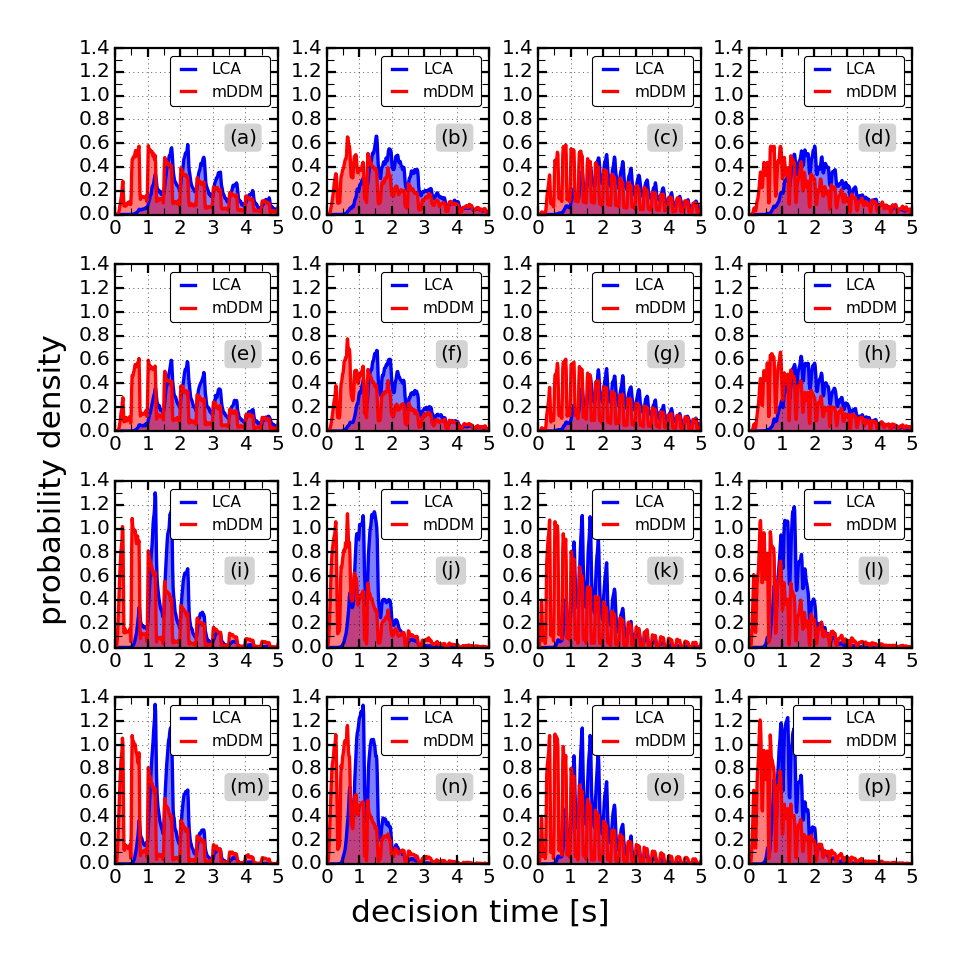

In [74]:
fig = plt.figure(figsize=(12, 12))

nr_row = 4
nr_col = 4

binNr = 601
bin_edges = np.linspace(0, 15, binNr, endpoint=True)

yCross,binEdgesCross=np.histogram(DTcrossA,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmA,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax1 = plt.subplot2grid((nr_row, nr_col), (0, 0), colspan=1)
ax1.hist(DTcrossA, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax1.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax1.hist(DTmddmA, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax1.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax1.xaxis.label.set_size(18)
ax1.yaxis.label.set_size(18)
#ax1.set_title(r'(g) $\rho_f=3/4$, $\rho_m=3/4$', fontsize=20, y=1.02)
ax1.tick_params(length=6, width=2, axis='both')
ax1.tick_params(axis='both', labelsize = 18)
#ax1.set_xlim([0, bin_edges[-1]])
#ax1.set_xlabel('condition')
ax1.grid(True)
#ax1.set_ylabel('probability', fontsize=22)
#ax1.set_xlabel('decision time', fontsize=22)
ax1.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax1.text(3.5, 0.6, '(a)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

####################
yCross,binEdgesCross=np.histogram(DTcrossB,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmB,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax2 = plt.subplot2grid((nr_row, nr_col), (2, 0), colspan=1, sharey=ax1)
ax2.hist(DTcrossB, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax2.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax2.hist(DTmddmB, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax2.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax2.xaxis.label.set_size(18)
ax2.yaxis.label.set_size(18)
#ax2.set_title(r'(d) $\rho_f=3/4$, $\rho_m=1$', fontsize=20, y=1.02)
ax2.tick_params(length=6, width=2, axis='both')
ax2.tick_params(axis='both', labelsize = 18)
#ax2.set_xlim([-0.2, 3.2])
#ax2.set_xlabel('condition')
ax2.grid(True)
#ax2.set_ylabel('probability', fontsize=22)
#ax2.set_xlabel('decision time', fontsize=22)
ax2.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax2.text(3.5, 0.6, '(i)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


####################
yCross,binEdgesCross=np.histogram(DTcrossC,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmC,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax3 = plt.subplot2grid((nr_row, nr_col), (1, 0), colspan=1, sharey=ax1)
ax3.hist(DTcrossC, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax3.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax3.hist(DTmddmC, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax3.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax3.xaxis.label.set_size(18)
ax3.yaxis.label.set_size(18)
#ax3.set_title(r'(a) $\rho_f=3/4$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax3.tick_params(length=6, width=2, axis='both')
ax3.tick_params(axis='both', labelsize = 18)
#ax3.set_xlim([-0.2, 3.2])
#ax3.set_xlabel('condition')
ax3.grid(True)
#ax3.set_ylabel('probability', fontsize=22)
#ax3.set_xlabel('decision time', fontsize=22)
ax3.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax3.text(3.5, 0.6, '(e)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

#########################################################
#########################################################

yCross,binEdgesCross=np.histogram(DTcrossD,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmD,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax4 = plt.subplot2grid((nr_row, nr_col), (3, 0), colspan=1, sharey=ax1)
ax4.hist(DTcrossD, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax4.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax4.hist(DTmddmD, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax4.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax4.xaxis.label.set_size(18)
ax4.yaxis.label.set_size(18)
#ax4.set_title(r'(h) $\rho_f=1$, $\rho_m=3/4$', fontsize=20, y=1.02)
ax4.tick_params(length=6, width=2, axis='both')
ax4.tick_params(axis='both', labelsize = 18)
#ax4.set_xlim([0, bin_edges[-1]])
#ax4.set_xlabel('condition')
ax4.grid(True)
#ax4.set_ylabel('probability', fontsize=22)
#ax4.set_xlabel('decision time', fontsize=22)
ax4.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax4.text(3.5, 0.6, '(m)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

####################
yCross,binEdgesCross=np.histogram(DTcrossE,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmE,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax5 = plt.subplot2grid((nr_row, nr_col), (0, 1), colspan=1, sharey=ax1)
ax5.hist(DTcrossE, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax5.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax5.hist(DTmddmE, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax5.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax5.xaxis.label.set_size(18)
ax5.yaxis.label.set_size(18)
#ax5.set_title(r'(e) $\rho_f=1$, $\rho_m=1$', fontsize=20, y=1.02)
ax5.tick_params(length=6, width=2, axis='both')
ax5.tick_params(axis='both', labelsize = 18)
#ax5.set_xlim([-0.2, 3.2])
#ax5.set_xlabel('condition')
ax5.grid(True)
#ax5.set_ylabel('probability', fontsize=22)
#ax5.set_xlabel('decision time', fontsize=22)
ax5.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax5.text(3.5, 0.6, '(b)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


####################
yCross,binEdgesCross=np.histogram(DTcrossF,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmF,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax6 = plt.subplot2grid((nr_row, nr_col), (2, 1), colspan=1, sharey=ax1)
ax6.hist(DTcrossF, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax6.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax6.hist(DTmddmF, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax6.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax6.xaxis.label.set_size(18)
ax6.yaxis.label.set_size(18)
#ax6.set_title(r'(b) $\rho_f=1$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax6.tick_params(length=6, width=2, axis='both')
ax6.tick_params(axis='both', labelsize = 18)
#ax6.set_xlim([-0.2, 3.2])
#ax6.set_xlabel('condition')
ax6.grid(True)
#ax6.set_ylabel('probability', fontsize=22)
#ax6.set_xlabel('decision time', fontsize=22)
ax6.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax6.text(3.5, 0.6, '(j)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


#########################################################
#########################################################

yCross,binEdgesCross=np.histogram(DTcrossG,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmG,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax7 = plt.subplot2grid((nr_row, nr_col), (1, 1), colspan=1, sharey=ax1)
ax7.hist(DTcrossG, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax7.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax7.hist(DTmddmG, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax7.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax7.xaxis.label.set_size(18)
ax7.yaxis.label.set_size(18)
#ax7.set_title(r'(i) $\rho_f=4/3$, $\rho_m=3/4$', fontsize=20, y=1.02)
ax7.tick_params(length=6, width=2, axis='both')
ax7.tick_params(axis='both', labelsize = 18)
#ax7.set_xlim([0, bin_edges[-1]])
#ax7.set_xlabel('condition')
ax7.grid(True)
#ax7.set_ylabel('probability', fontsize=22)
#ax7.set_xlabel('decision time', fontsize=22)
ax7.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax7.text(3.5, 0.6, '(f)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

####################
yCross,binEdgesCross=np.histogram(DTcrossH,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmH,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax8 = plt.subplot2grid((nr_row, nr_col), (3, 1), colspan=1, sharey=ax1)
ax8.hist(DTcrossH, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax8.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax8.hist(DTmddmH, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax8.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax8.xaxis.label.set_size(18)
ax8.yaxis.label.set_size(18)
#ax8.set_title(r'(f) $\rho_f=4/3$, $\rho_m=1$', fontsize=20, y=1.02)
ax8.tick_params(length=6, width=2, axis='both')
ax8.tick_params(axis='both', labelsize = 18)
#ax8.set_xlim([-0.2, 3.2])
#ax8.set_xlabel('condition')
ax8.grid(True)
#ax8.set_ylabel('probability', fontsize=22)
#ax8.set_xlabel('decision time', fontsize=22)
ax8.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax8.text(3.5, 0.6, '(n)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


####################
yCross,binEdgesCross=np.histogram(DTcrossI,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmI,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax9 = plt.subplot2grid((nr_row, nr_col), (0, 2), colspan=1, sharey=ax1)
ax9.hist(DTcrossI, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax9.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax9.hist(DTmddmI, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax9.plot(xnewMddm,y_smoothMddm, lw=3, ls='-', c='r', label='mDDM');
ax9.xaxis.label.set_size(18)
ax9.yaxis.label.set_size(18)
#ax9.set_title(r'(c) $\rho_f=4/3$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax9.tick_params(length=6, width=2, axis='both')
ax9.tick_params(axis='both', labelsize = 18)
#ax9.set_xlim([-0.2, 3.2])
#ax9.set_xlabel('condition')
ax9.grid(True)
#ax9.set_ylabel('probability', fontsize=22)
#ax9.set_xlabel('decision time', fontsize=22)
ax9.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax9.text(3.5, 0.6, '(c)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

####################
yCross,binEdgesCross=np.histogram(DTcrossJ,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmJ,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax10 = plt.subplot2grid((nr_row, nr_col), (2, 2), colspan=1, sharey=ax1)
ax10.hist(DTcrossJ, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax10.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax10.hist(DTmddmJ, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax10.plot(xnewMddm,y_smoothMddm, lw=3, ls='-', c='r', label='mDDM');
ax10.xaxis.label.set_size(18)
ax10.yaxis.label.set_size(18)
#ax10.set_title(r'(c) $\rho_f=4/3$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax10.tick_params(length=6, width=2, axis='both')
ax10.tick_params(axis='both', labelsize = 18)
ax10.grid(True)
ax10.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax10.text(3.5, 0.6, '(k)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


####################
yCross,binEdgesCross=np.histogram(DTcrossK,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmK,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax11 = plt.subplot2grid((nr_row, nr_col), (1, 2), colspan=1, sharey=ax1)
ax11.hist(DTcrossK, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax11.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax11.hist(DTmddmK, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax11.plot(xnewMddm,y_smoothMddm, lw=3, ls='-', c='r', label='mDDM');
ax11.xaxis.label.set_size(18)
ax11.yaxis.label.set_size(18)
#ax11.set_title(r'(c) $\rho_f=4/3$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax11.tick_params(length=6, width=2, axis='both')
ax11.tick_params(axis='both', labelsize = 18)
ax11.grid(True)
ax11.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax11.text(3.5, 0.6, '(g)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


####################
yCross,binEdgesCross=np.histogram(DTcrossL,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmL,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax12 = plt.subplot2grid((nr_row, nr_col), (3, 2), colspan=1, sharey=ax1)
ax12.hist(DTcrossL, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax12.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax12.hist(DTmddmL, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax12.plot(xnewMddm,y_smoothMddm, lw=3, ls='-', c='r', label='mDDM');
ax12.xaxis.label.set_size(18)
ax12.yaxis.label.set_size(18)
#ax12.set_title(r'(c) $\rho_f=4/3$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax12.tick_params(length=6, width=2, axis='both')
ax12.tick_params(axis='both', labelsize = 18)
ax12.grid(True)
ax12.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax12.text(3.5, 0.6, '(o)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


####################
yCross,binEdgesCross=np.histogram(DTcrossM,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmM,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax13 = plt.subplot2grid((nr_row, nr_col), (0, 3), colspan=1, sharey=ax1)
ax13.hist(DTcrossM, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax13.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax13.hist(DTmddmM, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax13.plot(xnewMddm,y_smoothMddm, lw=3, ls='-', c='r', label='mDDM');
ax13.xaxis.label.set_size(18)
ax13.yaxis.label.set_size(18)
#ax13.set_title(r'(c) $\rho_f=4/3$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax13.tick_params(length=6, width=2, axis='both')
ax13.tick_params(axis='both', labelsize = 18)
ax13.grid(True)
ax13.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax13.text(3.5, 0.6, '(d)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


####################
yCross,binEdgesCross=np.histogram(DTcrossN,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmN,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax14 = plt.subplot2grid((nr_row, nr_col), (2, 3), colspan=1, sharey=ax1)
ax14.hist(DTcrossN, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax14.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax14.hist(DTmddmN, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax14.plot(xnewMddm,y_smoothMddm, lw=3, ls='-', c='r', label='mDDM');
ax14.xaxis.label.set_size(18)
ax14.yaxis.label.set_size(18)
#ax14.set_title(r'(c) $\rho_f=4/3$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax14.tick_params(length=6, width=2, axis='both')
ax14.tick_params(axis='both', labelsize = 18)
ax14.grid(True)
ax14.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax14.text(3.5, 0.6, '(l)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


####################
yCross,binEdgesCross=np.histogram(DTcrossO,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmO,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax15 = plt.subplot2grid((nr_row, nr_col), (1, 3), colspan=1, sharey=ax1)
ax15.hist(DTcrossO, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax15.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax15.hist(DTmddmO, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax15.plot(xnewMddm,y_smoothMddm, lw=3, ls='-', c='r', label='mDDM');
ax15.xaxis.label.set_size(18)
ax15.yaxis.label.set_size(18)
#ax15.set_title(r'(c) $\rho_f=4/3$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax15.tick_params(length=6, width=2, axis='both')
ax15.tick_params(axis='both', labelsize = 18)
ax15.grid(True)
ax15.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax15.text(3.5, 0.6, '(h)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


####################
yCross,binEdgesCross=np.histogram(DTcrossP,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmP,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax16 = plt.subplot2grid((nr_row, nr_col), (3, 3), colspan=1, sharey=ax1)
ax16.hist(DTcrossP, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax16.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax16.hist(DTmddmP, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax16.plot(xnewMddm,y_smoothMddm, lw=3, ls='-', c='r', label='mDDM');
ax16.xaxis.label.set_size(18)
ax16.yaxis.label.set_size(18)
#ax16.set_title(r'(c) $\rho_f=4/3$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax16.tick_params(length=6, width=2, axis='both')
ax16.tick_params(axis='both', labelsize = 18)
ax16.grid(True)
ax16.legend(loc='upper right', fontsize=14, handlelength=2.2, fancybox=True)
ax16.text(3.5, 0.6, '(p)', color='black', fontsize=18,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]:
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')
    ax.tick_params('both', length=8, width=2, which='major')
    ax.tick_params('both', length=6, width=1, which='minor')
    ax.set_xlim([0,5])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

#fig.subplots_adjust(hspace=0.3)
#fig.subplots_adjust(wspace=0.3)

fig.subplots_adjust(left=0.12, bottom=0.1, right=0.95, top=0.95,
                wspace=0.3, hspace=0.3)

fig.text(0.5, 0.04, r'decision time [s]', ha='center', fontsize=28)
fig.text(0.04, 0.5, r'probability density', va='center', rotation='vertical', fontsize=28)
    
#fig.tight_layout()

In [75]:
#fig.savefig('FigDistrCompare_FreqCond_' + str(choose_fcond) +'_4mal4_June2018.png', format='png', dpi=150)
#fig.savefig('FigDistrCompare_FreqCond_' + str(choose_fcond) +'_4mal4_Jan2019.png', format='png', dpi=150)

### The following cell produces Fig. 12

<IPython.core.display.Javascript object>


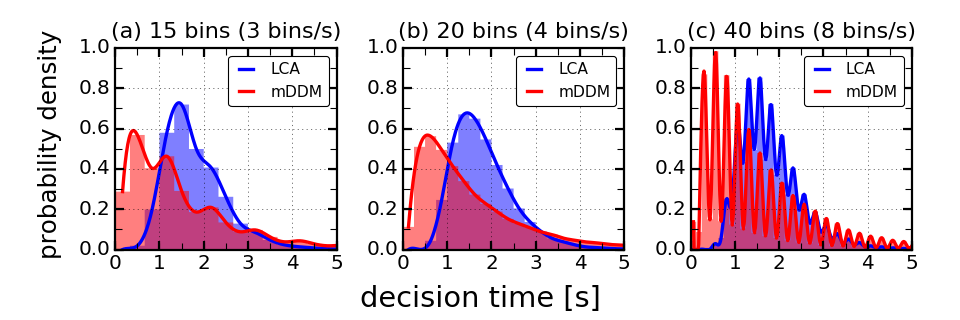

In [50]:
fig = plt.figure(figsize=(12, 4))

nr_row = 1#3
nr_col = 3
bbox_props = dict(boxstyle="round", fc="grey", ec="0.5", alpha=0.25)

binNr = 46
bin_edges = np.linspace(0, 15, binNr, endpoint=True)
yCross,binEdgesCross=np.histogram(DTcrossJ,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmJ,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax1 = plt.subplot2grid((nr_row, nr_col), (0, 0), colspan=1)
ax1.hist(DTcrossJ, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax1.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax1.hist(DTmddmJ, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax1.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax1.xaxis.label.set_size(18)
ax1.yaxis.label.set_size(18)
ax1.set_title(r'(a) 15 bins (3 bins/s)', fontsize=20, y=1.02)
ax1.tick_params(length=6, width=2, axis='both')
ax1.tick_params(axis='both', labelsize = 18)
#ax1.set_xlim([0, bin_edges[-1]])
#ax1.set_xlabel('condition')
ax1.grid(True)
#ax1.set_ylabel('probability', fontsize=22)
#ax1.set_xlabel('decision time', fontsize=22)
ax1.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)

####################
binNr = 61
bin_edges = np.linspace(0, 15, binNr, endpoint=True)
yCross,binEdgesCross=np.histogram(DTcrossJ,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmJ,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax2 = plt.subplot2grid((nr_row, nr_col), (0, 1), colspan=1, sharey=ax1)
ax2.hist(DTcrossJ, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax2.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax2.hist(DTmddmJ, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax2.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax2.xaxis.label.set_size(18)
ax2.yaxis.label.set_size(18)
ax2.set_title(r'(b) 20 bins (4 bins/s)', fontsize=20, y=1.02)
ax2.tick_params(length=6, width=2, axis='both')
ax2.tick_params(axis='both', labelsize = 18)
#ax2.set_xlim([-0.2, 3.2])
#ax2.set_xlabel('condition')
ax2.grid(True)
#ax2.set_ylabel('probability', fontsize=22)
#ax2.set_xlabel('decision time', fontsize=22)
ax2.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)


####################
binNr = 121
bin_edges = np.linspace(0, 15, binNr, endpoint=True)
yCross,binEdgesCross=np.histogram(DTcrossJ,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmJ,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax3 = plt.subplot2grid((nr_row, nr_col), (0, 2), colspan=1, sharey=ax1)
ax3.hist(DTcrossJ, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax3.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax3.hist(DTmddmJ, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax3.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax3.xaxis.label.set_size(18)
ax3.yaxis.label.set_size(18)
ax3.set_title(r'(c) 40 bins (8 bins/s)', fontsize=20, y=1.02)
ax3.tick_params(length=6, width=2, axis='both')
ax3.tick_params(axis='both', labelsize = 18)
#ax3.set_xlim([-0.2, 3.2])
#ax3.set_xlabel('condition')
ax3.grid(True)
#ax3.set_ylabel('probability', fontsize=22)
#ax3.set_xlabel('decision time', fontsize=22)
ax3.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
#ax3.text(3, 2.5, r"$\langle DT\rangle = $", ha="center", va="center", size=20,
#        bbox=bbox_props)

for ax in [ax1, ax2, ax3]:
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')
    ax.tick_params('both', length=8, width=2, which='major')
    ax.tick_params('both', length=6, width=1, which='minor')
    ax.set_xlim([0,5])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

    
#fig.subplots_adjust(hspace=0.3)
#fig.subplots_adjust(wspace=0.3)

fig.subplots_adjust(left=0.12, bottom=0.22, right=0.95, top=0.85,
                wspace=0.3, hspace=None)

fig.text(0.5, 0.04, r'decision time [s]', ha='center', fontsize=26)
fig.text(0.04, 0.55, r'probability density', va='center', rotation='vertical', fontsize=22)
#plt.tight_layout()

In [51]:
#fig.savefig('FigDistrCompare_Nyquist_BinNr_FreqCond_' + str(choose_fcond) +'_June2018.png', format='png', dpi=150)

### The following cells produce Fig. 2

In [43]:
m1 = [0.57, 1.14, 1.71, 2.29, 2.0, 2.18, 2.29, 2.4]
m2 = [0.43, 0.86, 1.29, 1.71, 2.0, 1.82, 1.71, 1.6]
m_len = 8
DTcross = []
DTmddm = []

for ma in range(m_len-4):
    filepath = '../DataGeneration/DataFiles/DistributionDTData_Continuous_constMagRatio_Mag1_' + str(m1[ma]) + '_Mag2_' + str(m2[ma])
    with open(str(filepath) + '.csv', 'r') as infile:
        infile.readline
        for line in infile:
            if not line.startswith('#'): # I usually use the first line in a data file to give some info using "#" 
                DTcross.append(float(line.split(',')[1]))  # "split" separates all objects in a line when delimeter "," occurs
                DTmddm.append(float(line.split(',')[3]))  # all objects in the data file are strings 
for ma in range(m_len-4, m_len):
    filepath = '../DataGeneration/DataFiles/DistributionDTData_Continuous_constMeanMag_Mag1_' + str(m1[ma]) + '_Mag2_' + str(m2[ma])
    with open(str(filepath) + '.csv', 'r') as infile:
        infile.readline
        for line in infile:
            if not line.startswith('#'): # I usually use the first line in a data file to give some info using "#" 
                DTcross.append(float(line.split(',')[1]))  # "split" separates all objects in a line when delimeter "," occurs
                DTmddm.append(float(line.split(',')[3]))  # all objects in the data file are strings 


In [44]:
tlen = 100000
DTcross = np.asarray(DTcross)
DTmddm = np.asarray(DTmddm)

DTcrossA = DTcross[0:tlen]
DTcrossB = DTcross[tlen:2*tlen]
DTcrossC = DTcross[2*tlen:3*tlen]
DTcrossD = DTcross[3*tlen:4*tlen]
DTcrossE = DTcross[4*tlen:5*tlen]
DTcrossF = DTcross[5*tlen:6*tlen]
DTcrossG = DTcross[6*tlen:7*tlen]
DTcrossH = DTcross[7*tlen:8*tlen]

DTmddmA = DTmddm[0:tlen]
DTmddmB = DTmddm[tlen:2*tlen]
DTmddmC = DTmddm[2*tlen:3*tlen]
DTmddmD = DTmddm[3*tlen:4*tlen]
DTmddmE = DTmddm[4*tlen:5*tlen]
DTmddmF = DTmddm[5*tlen:6*tlen]
DTmddmG = DTmddm[6*tlen:7*tlen]
DTmddmH = DTmddm[7*tlen:8*tlen]


In [45]:
print('meanDTcrossA = ', round(np.mean(DTcrossA),3))
print('meanDTcrossB = ', round(np.mean(DTcrossB),3))
print('meanDTcrossC = ', round(np.mean(DTcrossC),3))
print('meanDTcrossD = ', round(np.mean(DTcrossD),3))
print('meanDTcrossE = ', round(np.mean(DTcrossE),3))
print('meanDTcrossF = ', round(np.mean(DTcrossF),3))
print('meanDTcrossG = ', round(np.mean(DTcrossG),3))
print('meanDTcrossH = ', round(np.mean(DTcrossH),3))

print('meanDTmddmA = ', round(np.mean(DTmddmA), 3))
print('meanDTmddmB = ', round(np.mean(DTmddmB), 3))
print('meanDTmddmC = ', round(np.mean(DTmddmC), 3))
print('meanDTmddmD = ', round(np.mean(DTmddmD), 3))
print('meanDTmddmE = ', round(np.mean(DTmddmE), 3))
print('meanDTmddmF = ', round(np.mean(DTmddmF), 3))
print('meanDTmddmG = ', round(np.mean(DTmddmG), 3))
print('meanDTmddmH = ', round(np.mean(DTmddmH), 3))

meanDTcrossA =  3.064
meanDTcrossB =  1.604
meanDTcrossC =  1.178
meanDTcrossD =  0.964
meanDTcrossE =  0.978
meanDTcrossF =  0.971
meanDTcrossG =  0.964
meanDTcrossH =  0.949
meanDTmddmA =  3.073
meanDTmddmB =  1.625
meanDTmddmC =  1.135
meanDTmddmD =  0.877
meanDTmddmE =  0.902
meanDTmddmF =  0.89
meanDTmddmG =  0.877
meanDTmddmH =  0.855


<IPython.core.display.Javascript object>


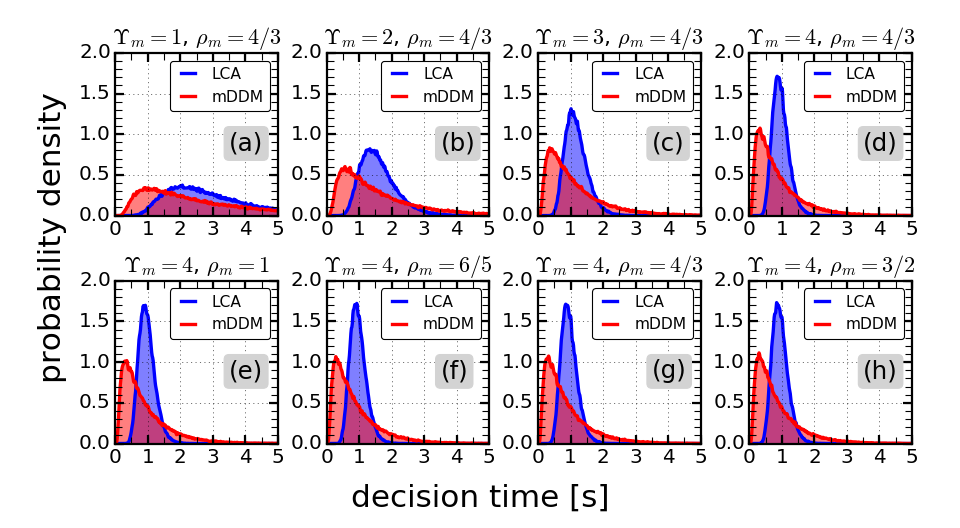

In [46]:
fig = plt.figure(figsize=(12, 6.6))

nr_row = 2
nr_col = 4

binNr = 601
bin_edges = np.linspace(0, 15, binNr, endpoint=True)

yCross,binEdgesCross=np.histogram(DTcrossA,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmA,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax1 = plt.subplot2grid((nr_row, nr_col), (0, 0), colspan=1)
ax1.hist(DTcrossA, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax1.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax1.hist(DTmddmA, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax1.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax1.xaxis.label.set_size(18)
ax1.yaxis.label.set_size(18)
ax1.set_title(r'$\Upsilon_m=1$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax1.tick_params(length=6, width=2, axis='both')
ax1.tick_params(axis='both', labelsize = 18)
#ax1.set_xlim([0, bin_edges[-1]])
#ax1.set_xlabel('condition')
ax1.grid(True)
#ax1.set_ylabel('probability', fontsize=22)
#ax1.set_xlabel('decision time', fontsize=22)
ax1.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax1.text(3.5, 0.8, '(a)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

####################
yCross,binEdgesCross=np.histogram(DTcrossB,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmB,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax2 = plt.subplot2grid((nr_row, nr_col), (0, 1), colspan=1, sharey=ax1)
ax2.hist(DTcrossB, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax2.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax2.hist(DTmddmB, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax2.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax2.xaxis.label.set_size(18)
ax2.yaxis.label.set_size(18)
ax2.set_title(r'$\Upsilon_m=2$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax2.tick_params(length=6, width=2, axis='both')
ax2.tick_params(axis='both', labelsize = 18)
#ax2.set_xlim([-0.2, 3.2])
#ax2.set_xlabel('condition')
ax2.grid(True)
#ax2.set_ylabel('probability', fontsize=22)
#ax2.set_xlabel('decision time', fontsize=22)
ax2.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax2.text(3.5, 0.8, '(b)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


####################
yCross,binEdgesCross=np.histogram(DTcrossC,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmC,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax3 = plt.subplot2grid((nr_row, nr_col), (0, 2), colspan=1, sharey=ax1)
ax3.hist(DTcrossC, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax3.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax3.hist(DTmddmC, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax3.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax3.xaxis.label.set_size(18)
ax3.yaxis.label.set_size(18)
ax3.set_title(r'$\Upsilon_m=3$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax3.tick_params(length=6, width=2, axis='both')
ax3.tick_params(axis='both', labelsize = 18)
#ax3.set_xlim([-0.2, 3.2])
#ax3.set_xlabel('condition')
ax3.grid(True)
#ax3.set_ylabel('probability', fontsize=22)
#ax3.set_xlabel('decision time', fontsize=22)
ax3.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax3.text(3.5, 0.8, '(c)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

#########################################################
#########################################################

yCross,binEdgesCross=np.histogram(DTcrossD,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmD,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax4 = plt.subplot2grid((nr_row, nr_col), (0, 3), colspan=1, sharey=ax1)
ax4.hist(DTcrossD, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax4.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax4.hist(DTmddmD, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax4.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax4.xaxis.label.set_size(18)
ax4.yaxis.label.set_size(18)
ax4.set_title(r'$\Upsilon_m=4$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax4.tick_params(length=6, width=2, axis='both')
ax4.tick_params(axis='both', labelsize = 18)
#ax4.set_xlim([0, bin_edges[-1]])
#ax4.set_xlabel('condition')
ax4.grid(True)
#ax4.set_ylabel('probability', fontsize=22)
#ax4.set_xlabel('decision time', fontsize=22)
ax4.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax4.text(3.5, 0.8, '(d)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

####################
yCross,binEdgesCross=np.histogram(DTcrossE,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmE,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax5 = plt.subplot2grid((nr_row, nr_col), (1, 0), colspan=1, sharey=ax1)
ax5.hist(DTcrossE, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax5.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax5.hist(DTmddmE, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax5.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax5.xaxis.label.set_size(18)
ax5.yaxis.label.set_size(18)
ax5.set_title(r'$\Upsilon_m=4$, $\rho_m=1$', fontsize=20, y=1.02)
ax5.tick_params(length=6, width=2, axis='both')
ax5.tick_params(axis='both', labelsize = 18)
#ax5.set_xlim([-0.2, 3.2])
#ax5.set_xlabel('condition')
ax5.grid(True)
#ax5.set_ylabel('probability', fontsize=22)
#ax5.set_xlabel('decision time', fontsize=22)
ax5.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax5.text(3.5, 0.8, '(e)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


####################
yCross,binEdgesCross=np.histogram(DTcrossF,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmF,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax6 = plt.subplot2grid((nr_row, nr_col), (1, 1), colspan=1, sharey=ax1)
ax6.hist(DTcrossF, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax6.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax6.hist(DTmddmF, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax6.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax6.xaxis.label.set_size(18)
ax6.yaxis.label.set_size(18)
ax6.set_title(r'$\Upsilon_m=4$, $\rho_m=6/5$', fontsize=20, y=1.02)
ax6.tick_params(length=6, width=2, axis='both')
ax6.tick_params(axis='both', labelsize = 18)
#ax6.set_xlim([-0.2, 3.2])
#ax6.set_xlabel('condition')
ax6.grid(True)
#ax6.set_ylabel('probability', fontsize=22)
#ax6.set_xlabel('decision time', fontsize=22)
ax6.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax6.text(3.5, 0.8, '(f)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


#########################################################
#########################################################

yCross,binEdgesCross=np.histogram(DTcrossG,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmG,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax7 = plt.subplot2grid((nr_row, nr_col), (1, 2), colspan=1, sharey=ax1)
ax7.hist(DTcrossG, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax7.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax7.hist(DTmddmG, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax7.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax7.xaxis.label.set_size(18)
ax7.yaxis.label.set_size(18)
ax7.set_title(r'$\Upsilon_m=4$, $\rho_m=4/3$', fontsize=20, y=1.02)
ax7.tick_params(length=6, width=2, axis='both')
ax7.tick_params(axis='both', labelsize = 18)
#ax7.set_xlim([0, bin_edges[-1]])
#ax7.set_xlabel('condition')
ax7.grid(True)
#ax7.set_ylabel('probability', fontsize=22)
#ax7.set_xlabel('decision time', fontsize=22)
ax7.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax7.text(3.5, 0.8, '(g)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

####################
yCross,binEdgesCross=np.histogram(DTcrossH,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmH,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax8 = plt.subplot2grid((nr_row, nr_col), (1, 3), colspan=1, sharey=ax1)
ax8.hist(DTcrossH, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax8.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax8.hist(DTmddmH, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax8.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax8.xaxis.label.set_size(18)
ax8.yaxis.label.set_size(18)
ax8.set_title(r'$\Upsilon_m=4$, $\rho_m=3/2$', fontsize=20, y=1.02)
ax8.tick_params(length=6, width=2, axis='both')
ax8.tick_params(axis='both', labelsize = 18)
#ax8.set_xlim([-0.2, 3.2])
#ax8.set_xlabel('condition')
ax8.grid(True)
#ax8.set_ylabel('probability', fontsize=22)
#ax8.set_xlabel('decision time', fontsize=22)
ax8.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True)
ax8.text(3.5, 0.8, '(h)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')
    ax.tick_params('both', length=8, width=2, which='major')
    ax.tick_params('both', length=6, width=1, which='minor')
    ax.set_xlim([0,5])
    ax.set_ylim([0,2])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

#fig.subplots_adjust(hspace=0.3)
#fig.subplots_adjust(wspace=0.3)

fig.subplots_adjust(left=0.12, bottom=0.16, right=0.95, top=0.9,
                wspace=0.3, hspace=0.4)

fig.text(0.5, 0.04, r'decision time [s]', ha='center', fontsize=28)
fig.text(0.04, 0.55, r'probability density', va='center', rotation='vertical', fontsize=28)
    
#fig.tight_layout()

In [47]:
#fig.savefig('FigDistrCompare_ContinSig_June2018.png', format='png', dpi=150)
#fig.savefig('FigDistrCompare_ContinSig_Jan2019.png', format='png', dpi=150)

### The following cells produce Fig.3

In [48]:
m1 = [0.57, 1.14, 1.71, 2.29, 2.0, 2.18, 2.29, 2.4]
m2 = [0.43, 0.86, 1.29, 1.71, 2.0, 1.82, 1.71, 1.6]
m_len = 8
SumDTcross = []
SumDTmddm = []
SumOpt1cross = []
SumOpt1mddm = []
#filepath = 'DistributionDTData_Continuous_Mag1_' + str(choose_m1) + '_Mag2_' + str(m2)

for ma in range(m_len-4):
    filepath = '../DataGeneration/DataFiles/DistributionSumData_Continuous_constMagRatio_Mag1_' + str(m1[ma]) + '_Mag2_' + str(m2[ma])
    with open(str(filepath) + '.csv', 'r') as infile:
        infile.readline
        for line in infile:
            if not line.startswith('#'): # I usually use the first line in a data file to give some info using "#" 
                SumDTcross.append(float(line.split(',')[0]))  # "split" separates all objects in a line when delimeter "," occurs
                SumOpt1cross.append(float(line.split(',')[2]))
                SumDTmddm.append(float(line.split(',')[5]))  # all objects in the data file are strings 
                SumOpt1mddm.append(float(line.split(',')[7])) 
                
for ma in range(m_len-4, m_len):
    filepath = '../DataGeneration/DataFiles/DistributionSumData_Continuous_constMeanMag_Mag1_' + str(m1[ma]) + '_Mag2_' + str(m2[ma])
    with open(str(filepath) + '.csv', 'r') as infile:
        infile.readline
        for line in infile:
            if not line.startswith('#'): # I usually use the first line in a data file to give some info using "#" 
                SumDTcross.append(float(line.split(',')[0]))  # "split" separates all objects in a line when delimeter "," occurs
                SumOpt1cross.append(float(line.split(',')[2]))
                SumDTmddm.append(float(line.split(',')[5]))  # all objects in the data file are strings 
                SumOpt1mddm.append(float(line.split(',')[7])) 

In [49]:
SumOpt1cross

[0.68213,
 0.6808900000000001,
 0.68662,
 0.69665,
 0.50129,
 0.6263799999999999,
 0.69665,
 0.75938]

<IPython.core.display.Javascript object>


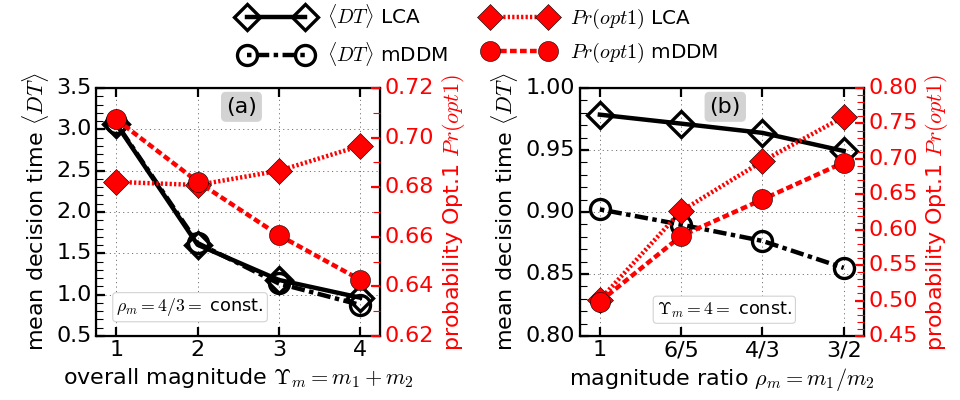

In [50]:
fig = plt.figure(figsize=(12, 5))

nr_row = 1
nr_col = 2

xlab_list_A = [r'1', r'2', r'3', r'4']
xlab_list_B = [r'1', r'6/5', r'4/3', r'3/2']

ax = plt.subplot2grid((nr_row, nr_col), (0, 0), colspan=1)
ax.plot(range(4), SumDTcross[0:4], 'kD', ms=16, fillstyle = 'none', markeredgewidth=3, ls='solid', lw=4, label=r'$\langle DT\rangle$ LCA')
ax.plot(range(4), SumDTmddm[0:4], marker='o', c='k', dashes=[4,4,12,4], ms=18, fillstyle = 'none', markeredgewidth=3, ls='solid', lw=4, label=r'$\langle DT\rangle$ mDDM')
ax.set_xticks(range(4))
ax.set_xticklabels(xlab_list_A, rotation='horizontal', fontsize=11)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.tick_params(length=6, width=2, axis='both')
ax.tick_params(axis='both', labelsize = 20)
ax.set_xlabel(r'overall magnitude $\Upsilon_m = m_1+m_2$')
ax.set_ylabel(r'mean decision time $\langle DT\rangle$')
#ax.set_title('Model: stable OU', fontsize=20)
ax.set_ylim([0.5, 3.5])
ax.grid()
#ax.legend(loc='upper right', bbox_to_anchor=(0.45, 0.34), fontsize=14, handlelength=3.5, frameon=False)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('k')
ax.tick_params('both', length=8, width=2, which='major')
ax.tick_params('both', length=6, width=1, which='minor')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

ax2 = ax.twinx()
ax2.plot(range(4), SumOpt1cross[0:4], marker='D', c='r', ms=16, dashes=[2,2], lw=4, label='$Pr(opt1)$ LCA')
ax2.plot(range(4), SumOpt1mddm[0:4], 'ro', ms=18, dashes=[6,3], lw=4, label='$Pr(opt1)$ mDDM')
ax2.tick_params(length=6, width=2, axis='both')
ax2.tick_params(axis='y', labelsize = 20, colors='r')
ax2.set_ylabel('probability Opt.1 $Pr(opt1)$', color='r', fontsize=20)
ax2.tick_params('y', length=8, width=2, which='major', colors='r')
ax2.tick_params('y', length=6, width=1, which='minor', colors='r')
ax2.set_xlim([-0.25, 3.25])
ax2.set_ylim([0.62, 0.72])
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.02))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
ax2.text(1.35, 0.71, '(a)', color='black', fontsize=20,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))
ax2.text(0, 0.63, r'$\rho_m = 4/3=$ const.', color='black', fontsize=16,
        bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

#ax2.legend(loc='upper right', bbox_to_anchor=(0.5, 0.18), fontsize=14, handlelength=3.5, frameon=False)


ax3 = plt.subplot2grid((nr_row, nr_col), (0, 1), colspan=1)
ax3.plot(range(4), SumDTcross[4:8], 'kD', ms=16, fillstyle = 'none', markeredgewidth=3, ls='solid', lw=4, label=r'$\langle DT\rangle$ LCA')
ax3.plot(range(4), SumDTmddm[4:8], 'ko', ms=18,dashes=[4,4,12,4], fillstyle = 'none', markeredgewidth=3, ls='solid', lw=4, label=r'$\langle DT\rangle$ mDDM')
ax3.set_xticks(range(4))
ax3.set_xticklabels(xlab_list_B, rotation='horizontal', fontsize=11)
ax3.xaxis.label.set_size(20)
ax3.yaxis.label.set_size(20)
ax3.tick_params(length=6, width=2, axis='both')
ax3.tick_params(axis='both', labelsize = 20)
ax3.set_xlabel(r'magnitude ratio $\rho_m = m_1/m_2$')
ax3.set_ylabel(r'mean decision time $\langle DT\rangle$')
#ax.set_title('Model: stable OU', fontsize=20)
ax3.set_ylim([0.8, 1])
ax3.grid()
ax3.legend(loc='upper right', bbox_to_anchor=(-0.4, 1.42), fontsize=18, handlelength=3.5, frameon=False)

for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)
    ax3.spines[axis].set_color('k')
ax3.tick_params('both', length=8, width=2, which='major')
ax3.tick_params('both', length=6, width=1, which='minor')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax3.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax3.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))

ax4 = ax3.twinx()
ax4.plot(range(4), SumOpt1cross[4:8], 'rD', ms=16, dashes=[2,2], lw=4, label='$Pr(opt1)$ LCA')
ax4.plot(range(4), SumOpt1mddm[4:8], 'ro', ms=18, dashes=[6,3], lw=4, label='$Pr(opt1)$ mDDM')
ax4.tick_params(length=6, width=2, axis='both')
ax4.tick_params(axis='y', labelsize = 20, colors='r')
ax4.set_ylabel('probability Opt.1 $Pr(opt1)$', color='r', fontsize=20)
ax4.tick_params('y', length=8, width=2, which='major', colors='r')
ax4.tick_params('y', length=6, width=1, which='minor', colors='r')
ax4.set_xlim([-0.25, 3.25])
ax4.set_ylim([0.45, 0.8])
ax4.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax4.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
ax4.text(1.35, 0.765, '(b)', color='black', fontsize=20,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))
ax4.text(0.7, 0.48, r'$\Upsilon_m = 4= $ const.', color='black', fontsize=16,
        bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

ax4.legend(loc='upper right', bbox_to_anchor=(0.55, 1.4), fontsize=18, handlelength=3.5, frameon=False)


fig.subplots_adjust(left=0.1, bottom=0.16, right=0.9, top=0.78,
                wspace=0.7, hspace=0.3)


#plt.tight_layout()

In [51]:
#fig.savefig('Fig_MeanDT_ProbOpt1_ContinSig_June2018.png', format='png', dpi=150)
#fig.savefig('Fig_MeanDT_ProbOpt1_ContinSig_Jan2019.png', format='png', dpi=150)